In [51]:
#import Library 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [52]:
#import Data
path = '/Users/hassn-/Downloads/adult.csv'
df = pd.read_csv(path)
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [53]:
#check Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [54]:
# check Null Values
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [106]:
for col in df.columns:
    print(f'columns: {col}')
    print(df[col].value_counts())
    print('\n')

columns: age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64


columns: educational-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64


columns: gender
1    32650
0    16192
Name: gender, dtype: int64


columns: capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: capital-gain, Length: 123, dtype: int64


columns: capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
2465        1
2080        1
155         1
1911        1
2201        1
Name: capital-loss, Length: 99, dtype: int64


columns: hours-per-week
40    22803
50     4246


In [56]:
#Encoding Categorical Data 
df = pd.concat([df.drop('occupation' , axis =1) , pd.get_dummies(df.occupation).add_prefix('occupation_')], axis = 1)
df = pd.concat([df.drop('workclass' , axis = 1) , pd.get_dummies(df.workclass).add_prefix('workclass_')] , axis = 1)
df = df.drop('education' , axis = 1)
df = pd.concat([df.drop('marital-status' , axis =1) , pd.get_dummies(df['marital-status']).add_prefix('marital-status_')] ,axis=1)
df = pd.concat([df.drop('relationship' ,axis =1 ) , pd.get_dummies(df.relationship).add_prefix('relationship_')] , axis = 1)
df = pd.concat([df.drop('race' ,axis =1 ) , pd.get_dummies(df.race).add_prefix('race_')] , axis = 1)
df = pd.concat([df.drop('native-country' ,axis =1 ) , pd.get_dummies(df['native-country']).add_prefix('native-country _')] , axis = 1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 92 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   age                                         48842 non-null  int64 
 1   fnlwgt                                      48842 non-null  int64 
 2   educational-num                             48842 non-null  int64 
 3   gender                                      48842 non-null  object
 4   capital-gain                                48842 non-null  int64 
 5   capital-loss                                48842 non-null  int64 
 6   hours-per-week                              48842 non-null  int64 
 7   income                                      48842 non-null  object
 8   occupation_?                                48842 non-null  uint8 
 9   occupation_Adm-clerical                     48842 non-null  uint8 
 10  occupation_Armed-Force

In [58]:
df['gender'] = df['gender'].apply(lambda x: 1 if x =='Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [59]:
df.columns

Index(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Nev

<Axes: >

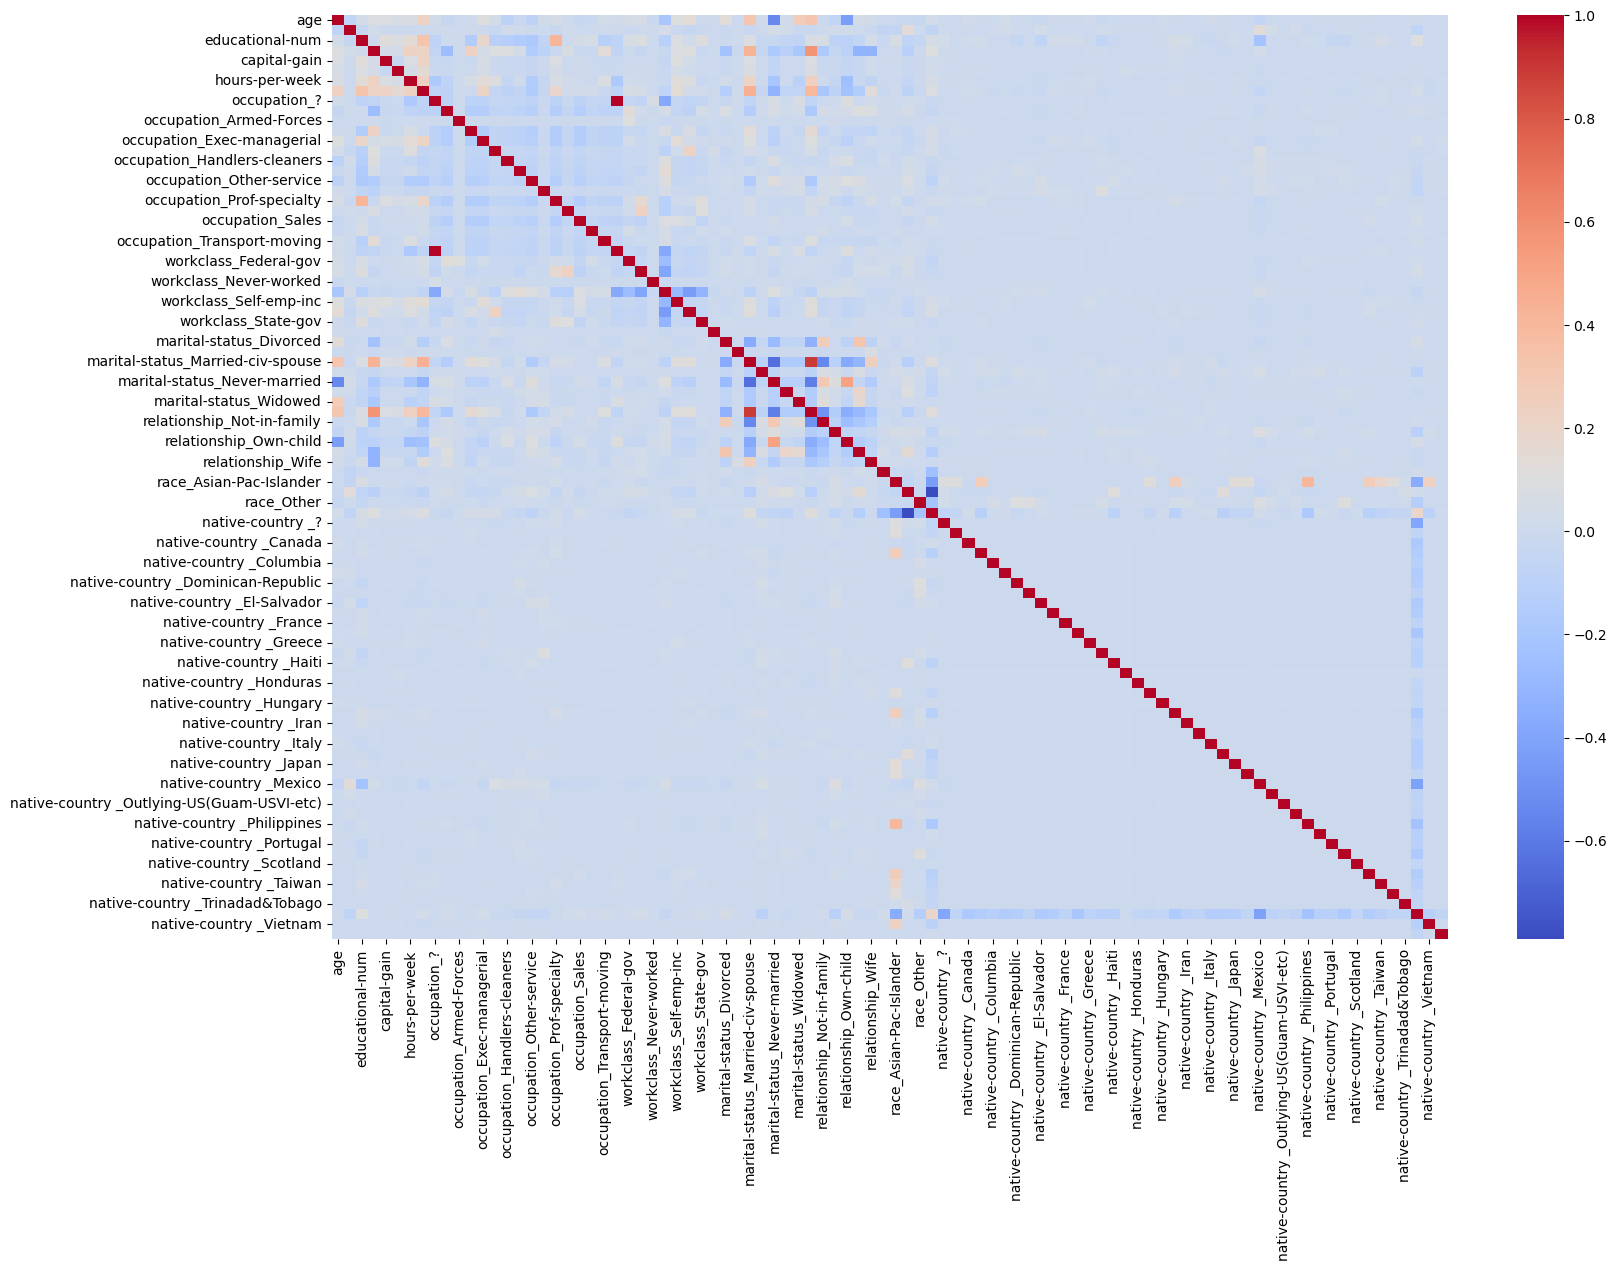

In [60]:
plt.figure(figsize = (18 ,12))
sns.heatmap(df.corr() , annot = False , cmap = 'coolwarm')

In [64]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_col_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_col_to_drop].index
df_dropped = df.drop(cols_to_drop , axis =1)

<Axes: >

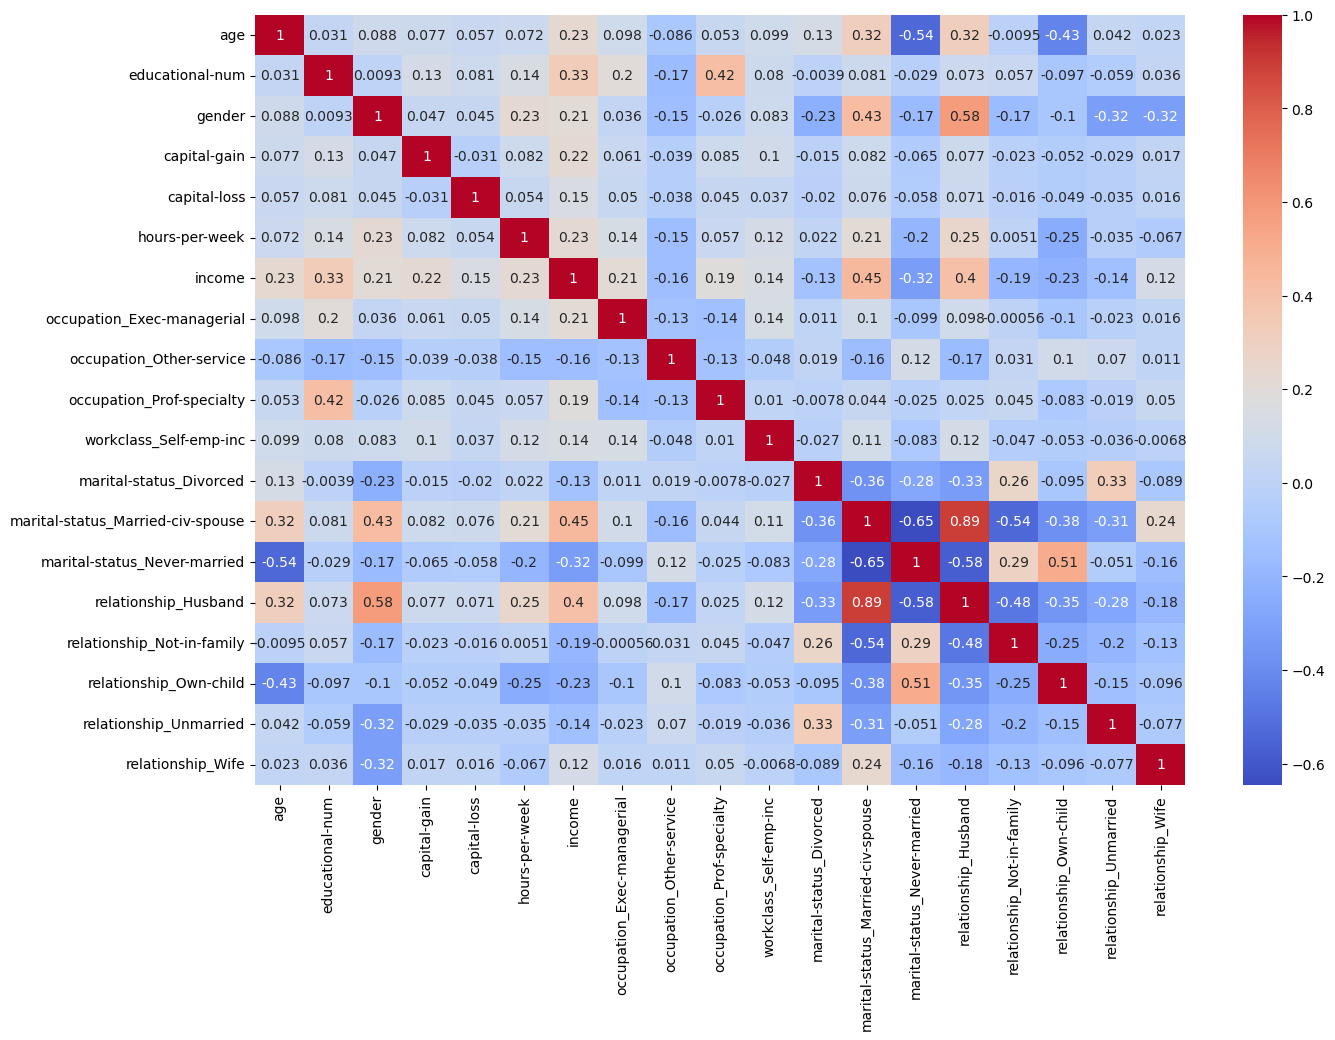

In [66]:
plt.figure(figsize = (15 ,10))
sns.heatmap(df_dropped.corr() , annot = True , cmap = 'coolwarm')

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
df = df.drop('fnlwgt' , axis = 1)
train_df , test_df = train_test_split(df , test_size = 0.2)

In [89]:
train_x = train_df.drop('income' , axis = 1)
train_y = train_df['income']

test_x = test_df.drop('income' , axis = 1)
test_y = test_df['income']

In [90]:
clf = RandomForestClassifier()
clf.fit(train_x , train_y)

RandomForestClassifier()

In [91]:
clf.score(test_x , test_y)

0.8561777049851571

In [92]:
clf.feature_importances_

array([2.30279277e-01, 1.24657967e-01, 1.28165641e-02, 1.13418145e-01,
       3.74657710e-02, 1.15750985e-01, 1.73957583e-03, 5.05058727e-03,
       8.10081031e-05, 6.20686337e-03, 1.90846712e-02, 4.33046958e-03,
       3.35491181e-03, 4.22662500e-03, 8.19949326e-03, 2.06283029e-04,
       1.95599133e-02, 2.90122972e-03, 6.38307401e-03, 4.03498178e-03,
       4.16395307e-03, 2.01042297e-03, 4.98410301e-03, 5.39850645e-03,
       2.50320494e-06, 9.29216647e-03, 6.01188593e-03, 7.91293908e-03,
       4.48741105e-03, 1.69220691e-04, 6.39114161e-03, 3.47780614e-04,
       7.54065460e-02, 8.22504703e-04, 2.45426877e-02, 2.08418780e-03,
       1.92109462e-03, 4.40729794e-02, 1.25055678e-02, 1.72611409e-03,
       5.87348406e-03, 5.49513730e-03, 9.18697203e-03, 1.42834903e-03,
       3.12347894e-03, 4.92640287e-03, 9.67787536e-04, 6.41081043e-03,
       2.81691070e-03, 2.34425485e-04, 1.44001522e-03, 6.21236854e-04,
       3.15368096e-04, 7.17876442e-04, 2.12843891e-04, 1.65630594e-04,
      

In [93]:
clf.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [94]:
importances = dict(zip(clf.feature_names_in_ ,clf.feature_importances_))
importances = {k:v for k,v in sorted(importances.items() , key = lambda x: x[1] , reverse = True)}

In [95]:
importances

{'age': 0.23027927662585143,
 'educational-num': 0.12465796660598948,
 'hours-per-week': 0.11575098498496293,
 'capital-gain': 0.11341814479003882,
 'marital-status_Married-civ-spouse': 0.07540654597193436,
 'relationship_Husband': 0.044072979442774995,
 'capital-loss': 0.037465771016133693,
 'marital-status_Never-married': 0.024542687686143993,
 'occupation_Prof-specialty': 0.019559913261622392,
 'occupation_Exec-managerial': 0.019084671224941438,
 'gender': 0.01281656413085109,
 'relationship_Not-in-family': 0.01250556783401648,
 'workclass_Private': 0.009292166465504938,
 'relationship_Wife': 0.00918697202856413,
 'occupation_Other-service': 0.008199493256343796,
 'workclass_Self-emp-not-inc': 0.007912939075124631,
 'race_White': 0.006410810429419716,
 'marital-status_Divorced': 0.006391141608481275,
 'occupation_Sales': 0.006383074014112637,
 'native-country _United-States': 0.006302194973148842,
 'occupation_Craft-repair': 0.006206863370241713,
 'workclass_Self-emp-inc': 0.0060118

In [99]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20 , 30],
            'min_samples_split': [2, 5, 10],
             'max_features':['sqrt' , 'log2'],
              'criterion' :['gini', 'entropy']}
grid_search = GridSearchCV(estimator = RandomForestClassifier(),param_grid = param_grid , verbose = 10)

In [100]:
grid_search.fit(train_x , train_y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 1/5; 1/144] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.848 total time=   2.3s
[CV 2/5; 1/144] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 2/5; 1/144] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.852 total time=   2.0s
[CV 3/5; 1/144] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 3/5; 1/144] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.842 total time=   1.8s
[CV 4/5; 1/144] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 4/5; 1/144] END criterion=gini, max_depth=None, max_features=sq

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=10)

In [101]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=200)

In [102]:
forest = grid_search.best_estimator_

In [103]:
forest.score(test_x , test_y)

0.8702016583068891

In [104]:
importances = dict(zip(clf.feature_names_in_ ,clf.feature_importances_))
importances = {k:v for k,v in sorted(importances.items() , key = lambda x: x[1] , reverse = True)}

In [105]:
importances

{'age': 0.23027927662585143,
 'educational-num': 0.12465796660598948,
 'hours-per-week': 0.11575098498496293,
 'capital-gain': 0.11341814479003882,
 'marital-status_Married-civ-spouse': 0.07540654597193436,
 'relationship_Husband': 0.044072979442774995,
 'capital-loss': 0.037465771016133693,
 'marital-status_Never-married': 0.024542687686143993,
 'occupation_Prof-specialty': 0.019559913261622392,
 'occupation_Exec-managerial': 0.019084671224941438,
 'gender': 0.01281656413085109,
 'relationship_Not-in-family': 0.01250556783401648,
 'workclass_Private': 0.009292166465504938,
 'relationship_Wife': 0.00918697202856413,
 'occupation_Other-service': 0.008199493256343796,
 'workclass_Self-emp-not-inc': 0.007912939075124631,
 'race_White': 0.006410810429419716,
 'marital-status_Divorced': 0.006391141608481275,
 'occupation_Sales': 0.006383074014112637,
 'native-country _United-States': 0.006302194973148842,
 'occupation_Craft-repair': 0.006206863370241713,
 'workclass_Self-emp-inc': 0.0060118